In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

url = 'C:/Users/Ahmadi/OneDrive/Desktop/datasets/1.2 kc_house_data_clustering.csv'
df = pd.read_csv(url).fillna(0)
df.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [2]:
#kmeans clustering
from sklearn.cluster import KMeans
clusters = KMeans(4)
clusters.fit(df)
df['clusterid'] = clusters.labels_
df[0:10]

C:\Users\Ahmadi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,clusterid
0,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,3
1,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,0
2,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,3
3,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,0
4,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,3
5,1225000,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,1
6,257500,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819,3
7,291850,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711,3
8,229500,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113,3
9,323000,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570,3


C:\Users\Ahmadi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Ahmadi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Ahmadi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Ahmadi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the valu

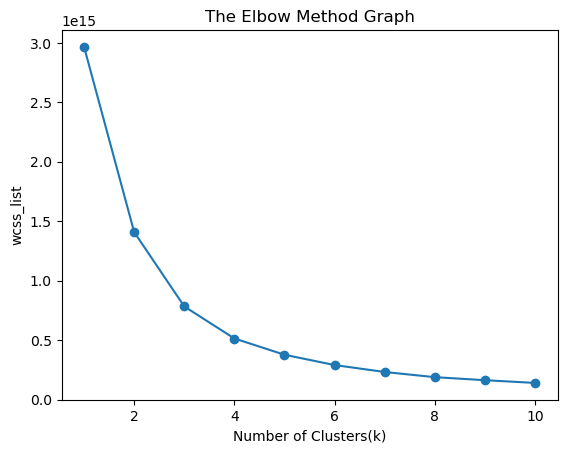

In [3]:
import matplotlib.pyplot as plt
wcss_list=[]
#using for loop for iterations from 1 t0 10
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(df)
    wcss_list.append(kmeans.inertia_)
    
plt.plot(range(1,11),wcss_list,marker='o')
plt.title('The Elbow Method Graph')
plt.xlabel('Number of Clusters(k)')
plt.ylabel('wcss_list')
plt.show()

C:\Users\Ahmadi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


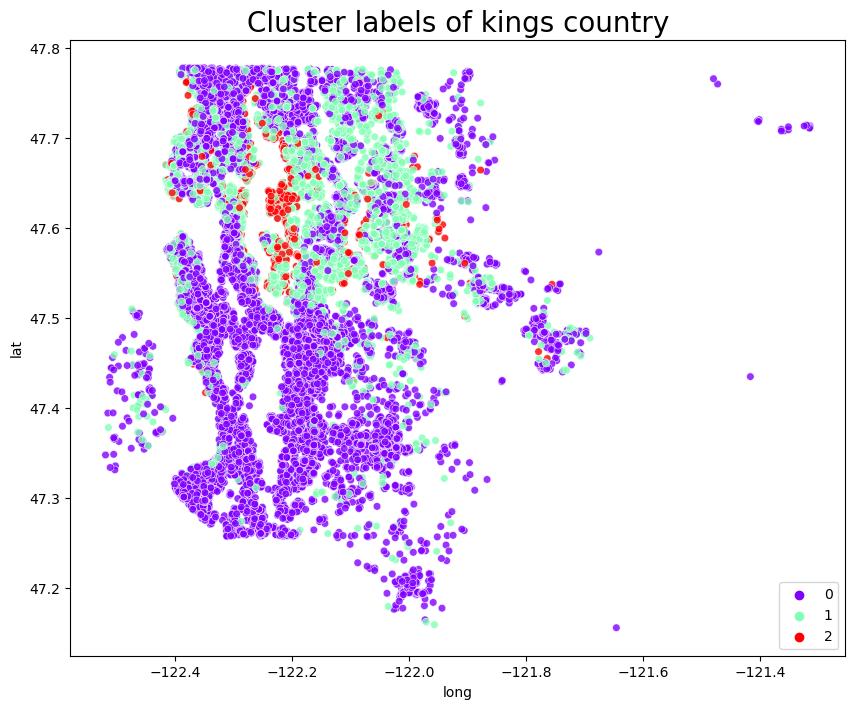

In [4]:
#visualization of the results with a scatter plot
from sklearn.cluster import KMeans
import seaborn as sns
url = 'C:/Users/Ahmadi/OneDrive/Desktop/datasets/1.2 kc_house_data_clustering.csv'
df = pd.read_csv(url).fillna(0)
clusters = KMeans(3)
clusters.fit(df)
df['clusterid'] = clusters.labels_
fig = plt.figure(figsize=(10,8))
plt.title('Cluster labels of kings country',loc='center',fontsize=20)
sns.scatterplot(x=df.long,y=df.lat,alpha=.8,s=30,hue=df['clusterid'],palette='rainbow',legend='auto')
plt.legend(loc='lower right')
plt.show()

In [5]:
#K-Medoids Clustering
from sklearn_extra.cluster import KMedoids
url = 'C:/Users/Ahmadi/OneDrive/Desktop/datasets/1.2 kc_house_data_clustering.csv'
df = pd.read_csv(url).fillna(0)
Kmedoids_clusters = KMedoids(n_clusters=3).fit(df)
df['kmedclusterid'] = Kmedoids_clusters.labels_
df[0:10]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,kmedclusterid
0,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,1
1,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2
2,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,1
3,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2
4,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2
5,1225000,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,0
6,257500,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819,1
7,291850,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711,1
8,229500,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113,1
9,323000,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570,1


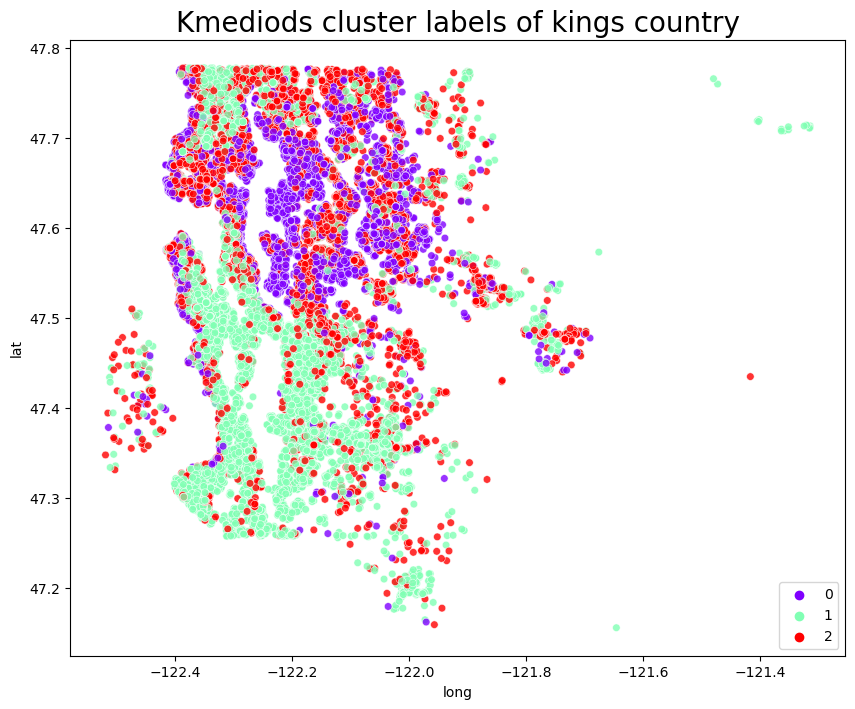

In [6]:
#visualization of the results with a scatter plot
from sklearn_extra.cluster import KMedoids
import seaborn as sns
url = 'C:/Users/Ahmadi/OneDrive/Desktop/datasets/1.2 kc_house_data_clustering.csv'
df = pd.read_csv(url).fillna(0)
kmedoids_clusters = KMedoids(n_clusters=3).fit(df)
df['kmedclusterid'] = kmedoids_clusters.labels_
fig = plt.figure(figsize=(10,8))
plt.title('Kmediods cluster labels of kings country',loc='center',fontsize=20)
sns.scatterplot(x=df.long,y=df.lat,alpha=.8,s=30,hue=df['kmedclusterid'],palette='rainbow',legend='auto')
plt.legend(loc='lower right')
plt.show()

In [7]:
url = 'C:/Users/Ahmadi/OneDrive/Desktop/datasets/1.1 custdata.csv'
df = pd.read_csv(url).fillna(0)
df

,income,age
0,11300,49
1,0,40
2,4500,22
3,20000,22
4,12000,31
5,180000,40
6,120000,39
7,40000,48
8,9400,44
9,24000,70


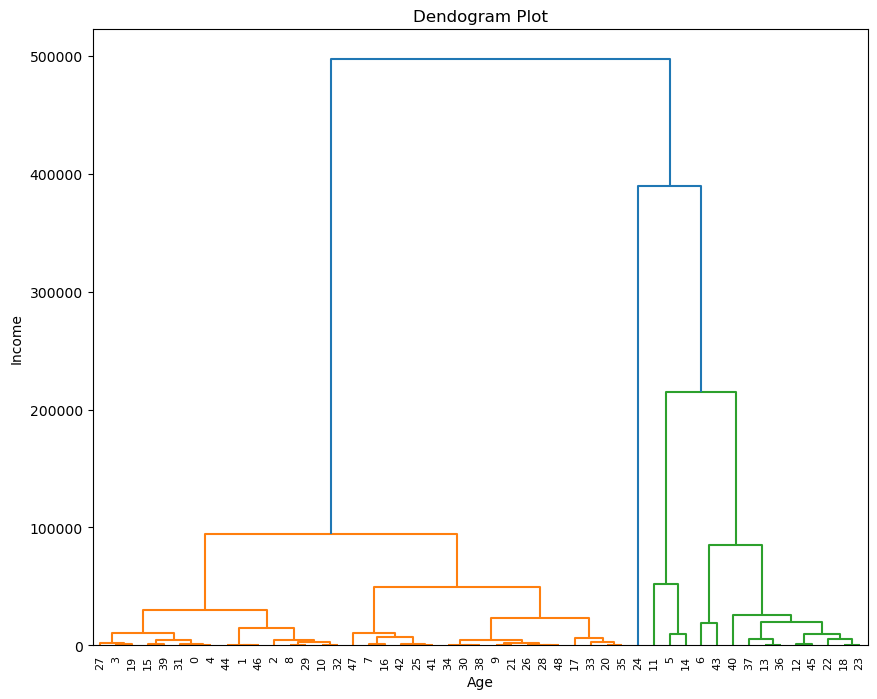

In [8]:
import scipy.cluster.hierarchy as shc
x = df.iloc[:,[0,1]].values
plt.figure(figsize=(10,8))
dendro = shc.dendrogram(shc.linkage(x,method='ward'))
plt.title('Dendogram Plot')
plt.ylabel('Income')
plt.xlabel('Age')
plt.show()

In [9]:
# training the heirarchical model on dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
y_pred = hc.fit_predict(x)
y_pred

C:\Users\Ahmadi\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1], dtype=int64)

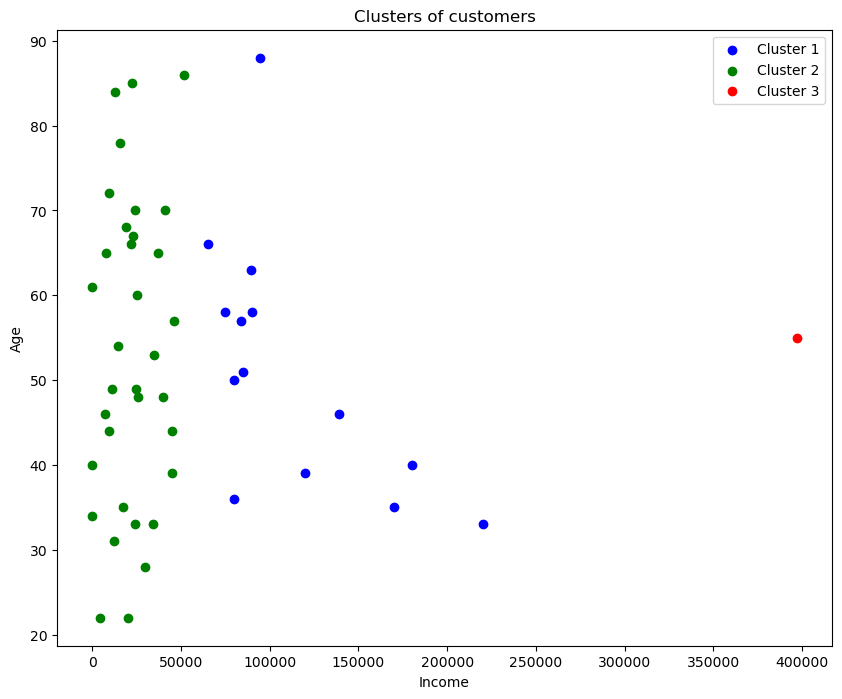

In [10]:
# visualizing the clusters
plt.figure(figsize=(10,8))
plt.scatter(x[y_pred==0,0],x[y_pred==0,1],c='blue',label='Cluster 1')
plt.scatter(x[y_pred==1,0],x[y_pred==1,1],c='green',label='Cluster 2')
plt.scatter(x[y_pred==2,0],x[y_pred==2,1],c='red',label='Cluster 3')
plt.title('Clusters of customers')
plt.xlabel('Income')
plt.ylabel('Age')
plt.legend()
plt.show()